**Bibliotecas**

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **1°) Questão - Letra a:**

---



---



#**Escolhendo valores para o experimento**
µ = 11 e σ^2 = 9.

In [110]:
SEED = 123
np.random.seed(SEED) #função para preservar o resultado se as entradas forem as mesmas(detalhe)

**Definindo os parâmetros populacionais e o tamanho das amostras**

n E {10,50,100,500,1000}

In [111]:
mean_pop = 11
variancia = 9
std = np.sqrt(variancia)
q = 1000

#tamanho das amostras
tamanho_n = [10, 50, 100, 500, 1000]

**Definindo uma função para simular os valores**


O def "simular_medias", função que irá simular as médias, terá como parâmentros já definidos:  média populacional, variância da população ,tamanho da amostra e uma seed que tem a função de preservar o resultado se as entradas forem as mesmas.

'amostras_medias' É uma lista que armazenará os resultados do loop for abaixo.

O for irá rodar 'q' vezes, ou seja 1000 vezes, teremos assim 1000 amostras de cada tamanho_n.

'amostra' É uma variável que irá gerar n dados aleatórios com distribuição normal(com ->np.random.normal) e após isso assim utilizando a função append vamos amazenar as médias das amostras na lista 'amostras_medias'

Por fim retornaremos a amostras_medias para obter seus resultados.



In [112]:
#Função que irá simular as médias

def simular_medias(mean_pop, std, n, q):
    amostras_medias = []
    for _ in range(q):
        amostra = np.random.normal(mean_pop, std, n)
        amostras_medias.append(np.mean(amostra))
    return amostras_medias

**Gerando 5 amostras aleatórias obtidas de uma população com Distribuição Normal X~N(11,9)**

Optei deixar os resultados da def "simular_medias" em um dicionário.

O for irá pegar cada índice do tamanho_n e vai rodar até chegar no tamanho_n[4]= 1000. Então o dicionário irá chamar a def "simular_medias" utilizado os parâmetros necessários e irá categorizar eles "normal10": [1000 amostras tamanho 10], "normal50": [1000 amostras tamanho 50],..., "normal1000": [1000 amostras tamanho 1000]

In [113]:
simulacoes = {}

#criando os valores para o dicionario
for n in tamanho_n: # tamanho_n = [10, 50, 100, 500, 1000]
  simulacoes[f'normal{n}'] = simular_medias(mean_pop, std, n, q)

# **Notando se cada amostra de tamanho n segue realmente um padrão de distribuição normal**



In [114]:
#Separando as amostras do dicionario que contia todas as simulações

amostra1 = simulacoes['normal10']
amostra2 = simulacoes['normal50']
amostra3 = simulacoes['normal100']
amostra4 = simulacoes['normal500']
amostra5 = simulacoes['normal1000']

**Verificando se há outliers mesmo com std = 3 **

**Verificando os outliers**


---



Fizemos o código para ver os pontos máximos e mínimos das amostras a fim de analisar presença de outliers. Mas o que chamou mais atenção foi que o desvio padrão das amostras estão cada vez mais baixos a medida que n aumenta, ou seja, o valores máximos estão bem próximos aos valores dos mínimos a medida que n aumenta.

 Abaixo tem uma tabela feita pela função DataFrame para nos ajudar a visualizar melhor.



In [115]:
amostras_teste = [amostra1,amostra2,amostra3,amostra4,amostra5]

Maximos = {}
Minimos = {}
for i, amostra in enumerate(amostras_teste):
  Maximos[f'Máximo{i+1}'] = np.max(amostra)

for i, amostra in enumerate(amostras_teste):
  Minimos[f'Mínimo{i+1}'] = np.min(amostra)

print(Maximos)
print(Minimos)

{'Máximo1': np.float64(13.812659805799512), 'Máximo2': np.float64(12.427556404661816), 'Máximo3': np.float64(12.098820042328041), 'Máximo4': np.float64(11.407595543761646), 'Máximo5': np.float64(11.309352357597586)}
{'Mínimo1': np.float64(7.0906114786796035), 'Mínimo2': np.float64(9.631706765894831), 'Mínimo3': np.float64(10.140952424706903), 'Mínimo4': np.float64(10.52071066815833), 'Mínimo5': np.float64(10.733577171468196)}


In [116]:
tabela_max_min = pd.DataFrame({
    'n': tamanho_n,
    'Máximos': [Maximos[f'Máximo{i+1}'] for i in range(len(tamanho_n))],
    'Mínimos': [Minimos[f'Mínimo{i+1}'] for i in range(len(tamanho_n))]
})
tabela_max_min.round(4)

,n,Máximos,Mínimos
0,10,13.8127,7.0906
1,50,12.4276,9.6317
2,100,12.0988,10.1410
3,500,11.4076,10.5207
4,1000,11.3094,10.7336


**Diferença entre valores:**

In [117]:
subtração =  tabela_max_min['Máximos'] - tabela_max_min['Mínimos']
tabela_max_min['Diferença'] = subtração
tabela_max_min.round(4)

,n,Máximos,Mínimos,Diferença
0,10,13.8127,7.0906,6.7220
1,50,12.4276,9.6317,2.7958
2,100,12.0988,10.1410,1.9579
3,500,11.4076,10.5207,0.8869
4,1000,11.3094,10.7336,0.5758


** Distribuição Normal / Gausiana **


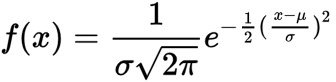

É uma função que define uma curva, a área sob a curva descreve a probabilidade de ocorrer algum determinado evento.

**Características:**

Tem formato de sino, onde a média vai determinar a posição do gráfico e o desvio padrão vai mostrar se o formato de sino está mais fino(isto é, dizer que o desvio padrão das amostras são baixos) ou se o formato de sino esta mais achatado(isto é, o desvio padrão das amostras está alta).

Abaixo plotei os gráficos de cada amostras.

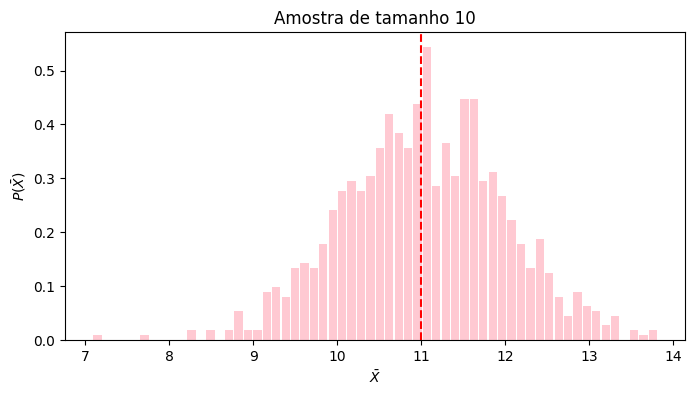

In [118]:
plt.figure(figsize= (8,4))
a = plt.hist(x = amostra1, bins =60, color='pink',alpha = 0.85 ,rwidth = 0.877,label = str(q), density=True)
plt.axvline(x= mean_pop,color='r',linestyle ='--', label = 'Media')

plt.title('Amostra de tamanho 10')
plt.xlabel(r'$\bar{X}$', fontsize =10)
plt.ylabel(r'$P(\bar{X})$', fontsize =10)
plt.show(True)

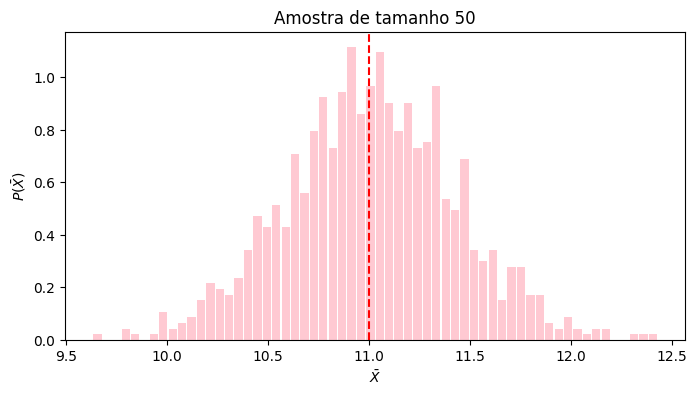

In [119]:
plt.figure(figsize= (8,4))
a = plt.hist(x = amostra2, bins =60, color='pink',alpha = 0.85 ,rwidth = 0.88,label = str(q), density=True)
plt.axvline(x= mean_pop,color='r',linestyle ='--', label = 'Media')

plt.title('Amostra de tamanho 50')
plt.xlabel(r'$\bar{X}$', fontsize =10)
plt.ylabel(r'$P(\bar{X})$', fontsize =10)
plt.show(True)

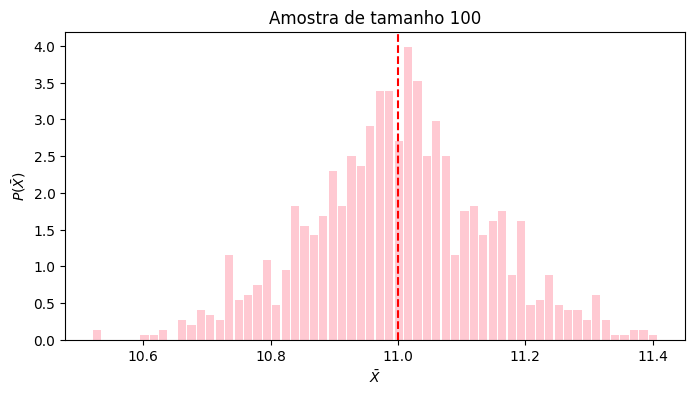

In [120]:
plt.figure(figsize= (8,4))
a = plt.hist(x = amostra4, bins =60, color='pink',alpha = 0.85 ,rwidth = 0.87,label = str(q), density=True)
plt.axvline(x= mean_pop,color='r',linestyle ='--', label = 'Media')

plt.title('Amostra de tamanho 100')
plt.xlabel(r'$\bar{X}$', fontsize =10)
plt.ylabel(r'$P(\bar{X})$', fontsize =10)
plt.show(True)

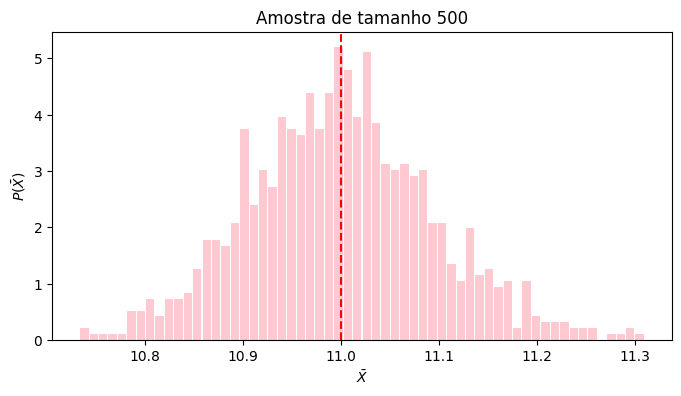

In [121]:
plt.figure(figsize= (8,4))
a = plt.hist(x = amostra5, bins =60, color='pink',alpha = 0.85 ,rwidth = 0.89,label = str(q), density=True)
plt.axvline(x= mean_pop,color='r',linestyle ='--', label = 'Media')

plt.title('Amostra de tamanho 500')
plt.xlabel(r'$\bar{X}$', fontsize =10)
plt.ylabel(r'$P(\bar{X})$', fontsize =10)
plt.show(True)

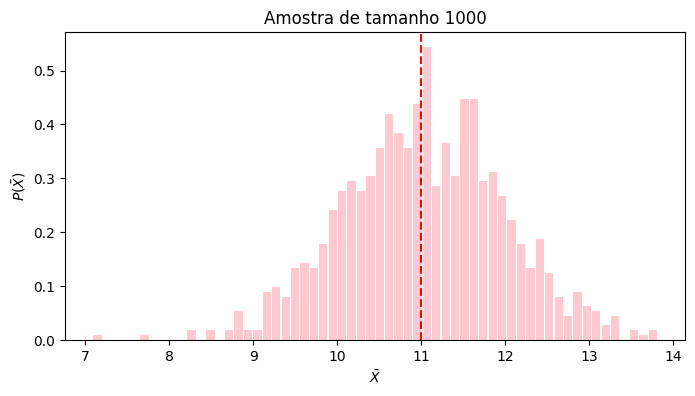

In [122]:
plt.figure(figsize= (8,4))
a = plt.hist(x = amostra1, bins =60, color='pink',alpha = 0.85 ,rwidth = 0.88,label = str(q), density=True)
plt.axvline(x= mean_pop,color='r',linestyle ='--', label = 'Media')

plt.title('Amostra de tamanho 1000')
plt.xlabel(r'$\bar{X}$', fontsize =10)
plt.ylabel(r'$P(\bar{X})$', fontsize =10)
plt.show(True)

# **Plotando o gráfico de convergência**




**Calculando a média das médias de cada amostra:**

A variável 'mean_mean' vai calcular a média de cada amostra presente no dicionário 'simulacoes' com a função da numpy (np.mean), utilizei um for para navergar por todos os termos do dicionário.

---

Matemáticamente:

Sendo uma amostra de tamanho n(x1,x2,x3,...,xn)
a média das médias amostrais é dada pela fórmula x- = (x1,x2,...,xn)/n

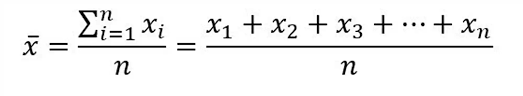

Ela serve como um estimador, ou seja, uma fórmula que nos permite obter um valor númerico para determinar estatística amostral da média populacional.

E(x) = µ

A estimativa é o resultado de um estimador. Nesse caso vamos obter 5 estimativas ao executar a variavel "mean_mean"



In [123]:
mean_mean = [np.mean(simulacoes[f'normal{n}']) for n in tamanho_n]

**Mostrando resultados com apenas 4 casas decimais para melhor visualização dos resultados obtidos(mean_mean)**

In [124]:
quantidade_media_medias = len(mean_mean)
print(f"-> Quantidade de médias amostrais: {quantidade_media_medias}")
print('---------------------')


def chamando_detalhes(mean_mean):
  print('-> Valores arredondados')
  print('---------------------')

  for n in mean_mean:
    arredondado = round(n, 8)
    print(arredondado)
  print('---------------------')

chamando_detalhes(mean_mean)

-> Quantidade de médias amostrais: 5
---------------------
-> Valores arredondados
---------------------
11.02913568
11.00974851
11.00301129
10.99865604
10.99900962
---------------------


**Valor mais próximo de 11**

´'subs = []' é uma lista que irá armazenar os calculos por meio de um append e o for irá percorrer todos os valores de 'mean_mean' para fazer a subtração (11 - 'mean_mean') em todos os valores de 'mean_mean'.  

In [125]:
subs = []
for n in range(len(mean_mean)):
  subtração = 11 -mean_mean[n]
  subs.append(subtração)

Os valores negativos se deram pois algumas médias das médias de determinadas amostras eram maiores que a média populacional 11.

In [126]:
#Usando tabela de Dataframe

valor_proximo_n = pd.DataFrame({
    'n': tamanho_n,
    'Módulo': subs
})

valor_proximo_n.round(4)

,n,Módulo
0,10,-0.0291
1,50,-0.0097
2,100,-0.0030
3,500,0.0013
4,1000,0.0010


Plotando um gráfico para comparar se os valores das médias das médias converge para a média populacional.

mean_pop = 11


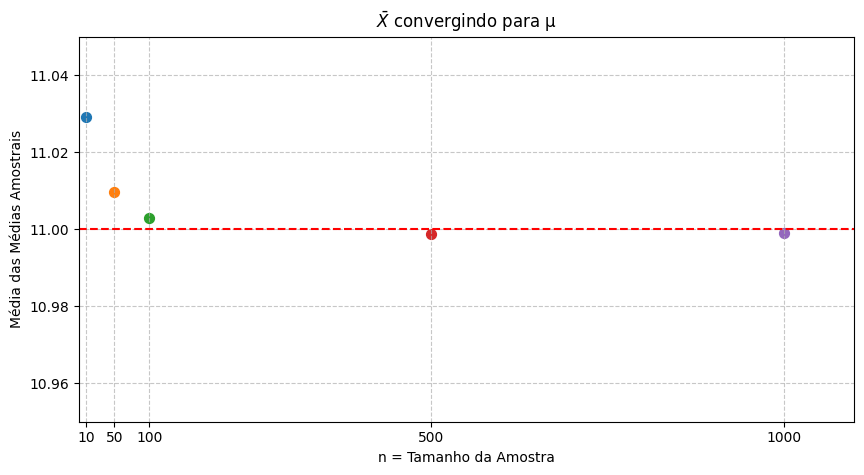

In [127]:
print(f"mean_pop = {mean_pop}")
plt.figure(figsize=(10,5))
plt.axhline(y = mean_pop, color='red', linestyle='--', label=f'Média populacional (μ = {mean_pop})')
plt.xlim(0, 1100)
plt.ylim(10.95, 11.05)

# Plotando cada ponto com o tamanho da amostra
for i, n in enumerate(tamanho_n):
    plt.scatter(n, mean_mean[i], label=f'n = {n}', s=50)

plt.title(r'$\bar{X}$ convergindo para µ')

plt.xlabel("n = Tamanho da Amostra")
plt.ylabel("Média das Médias Amostrais")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(tamanho_n)

plt.show()

In [128]:
# Mostrando estatísticas descritivas
print("\nResumo dos resultados :")

print('-------------------------------------')
print(f'Media populacional: {mean_pop}')
print(f'Desvio padrão: {std}')
print(f'Variância: {variancia}')
print('-------------------------------------')
for n in tamanho_n:
    print(f"\nPara n = {n}:")
    print(f"Média: {np.mean(simulacoes[f'normal{n}']):.4f}")
    print(f"Desvio Padrão: {np.std(simulacoes[f'normal{n}']):.4f}")
    print(f"Variância: {np.var(simulacoes[f'normal{n}']):.4f}")


Resumo dos resultados :
-------------------------------------
Media populacional: 11
Desvio padrão: 3.0
Variância: 9
-------------------------------------

Para n = 10:
Média: 11.0291
Desvio Padrão: 0.9559
Variância: 0.9138

Para n = 50:
Média: 11.0097
Desvio Padrão: 0.4201
Variância: 0.1765

Para n = 100:
Média: 11.0030
Desvio Padrão: 0.2983
Variância: 0.0890

Para n = 500:
Média: 10.9987
Desvio Padrão: 0.1406
Variância: 0.0198

Para n = 1000:
Média: 10.9990
Desvio Padrão: 0.0942
Variância: 0.0089


# **1°) Questao - Letra b:**

---



---



**Vendo se o desvio-padrão das médias das amostras converge para  σ/√n a medida que n aumenta**

---



---




O termo (σ/√n) representa o erro padrão da média, que indica o grau de variabilidade ou dispersão das médias de várias amostras em relação à média verdadeira da população. Em outras palavras, ele é o desvio padrão das médias amostrais.

O erro padrão mede a precisão da média obtida a partir de uma amostra: quanto menor for esse valor, mais próxima a média amostral tende a estar da média populacional real. Por isso, quanto maior o tamanho da amostra (n), menor o erro padrão e, consequentemente, maior a **confiabilidade** da estimativa.


A variável 'epm' está armazenando os os resultados de cada erro padrão, onde 'n' será os números das amostras e **σ** o desvio-padrão da população. O loop for vai percorrer cada valor do 'tamanho_n'.


In [129]:
#calculando o erro padrão para cada amostra tamanho n
epm = [std/np.sqrt(n) for n in tamanho_n]

In [130]:
tabela_epm = pd.DataFrame({
    'n': tamanho_n,
    'E.p.m': epm
})
tabela_epm.round(4)

,n,E.p.m
0,10,0.9487
1,50,0.4243
2,100,0.3000
3,500,0.1342
4,1000,0.0949


**Calculando desvio-padrão de cada amostra**

Vendo quão variados os dados das amostras estão a medida que o tamanho cresce.

'desvio_padrao_amostras' vai calcular o desvio padrão de todas as amostras que estão guardadas em 'simulacoes'


In [131]:
desvio_padrao_amostras = [np.std(simulacoes[f'normal{n}']) for n in tamanho_n]

In [132]:
tabela_epm = pd.DataFrame({
    'n': tamanho_n,
    'std_amostras': desvio_padrao_amostras
})
tabela_epm.round(4)

,n,std_amostras
0,10,0.9559
1,50,0.4201
2,100,0.2983
3,500,0.1406
4,1000,0.0942


In [133]:
minimo = min(desvio_padrao_amostras)
print(f"Menor desvio padrão = {minimo}") # esse é o desvio padrão da amostra tamanho 1000
maximo = max(desvio_padrao_amostras)
print(f"Maior desvio padrão = {maximo}") #esse é o desvio padrão da amostra de tamanho 10

#note que conseguiriamos provar a questão nesse simples código, mas para melhor visualização irei plotar gráficos e uma tabela para melhor visualização dos resultados

Menor desvio padrão = 0.09420426929726683
Maior desvio padrão = 0.9559156676656687


**Metódo que irei utilizar para análisar essas informações será uma tabela de comparação e um gráfico como no anterior.**

Desvio padrão = [np.float64(0.9559156676656687), np.float64(0.4200624604564064), np.float64(0.2982752532512259), np.float64(0.1405944761046105), np.float64(0.09420426929726683)]


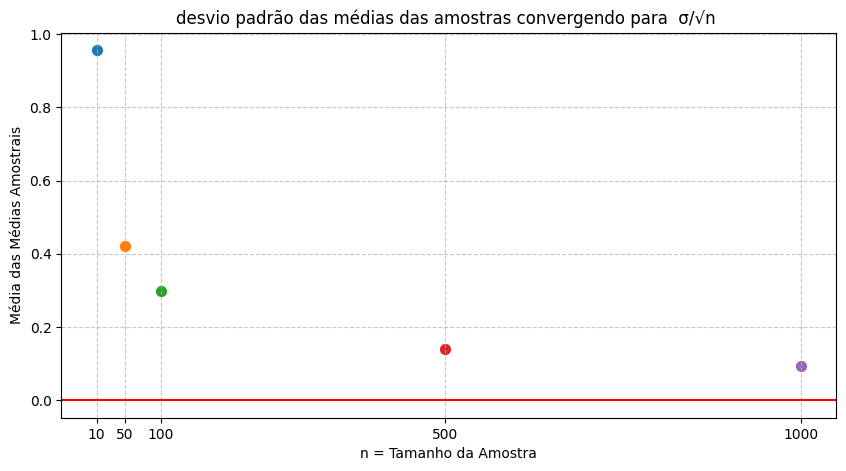

In [134]:
#Grafico para entendermos comos os valores se comportam em direção da epm

print(f"Desvio padrão = {desvio_padrao_amostras}")
plt.figure(figsize=(10,5))

# Como 0 seria o menor valor possivel para o erro padrão eu decidi utilizar ele como comparação
plt.axhline(y = 0, color='red', label=f'Erro padrão da média amostral (= {epm})')

# Plotando cada ponto com o tamanho da amostra
for i, n in enumerate(tamanho_n):
    plt.scatter(n, desvio_padrao_amostras[i], label=f'n = {n}', s=50) # desvio padrao de cada tamanho n

plt.title("desvio padrão das médias das amostras convergendo para  σ/√n ")

plt.xlabel("n = Tamanho da Amostra")
plt.ylabel("Média das Médias Amostrais")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(tamanho_n)

plt.show()

**Conclusão: O desvio padrão das médias das amostras converge para  σ/√n a media que n aumenta neste experimento**

In [135]:
tabela = pd.DataFrame({

    'n': tamanho_n,
    'std_média': desvio_padrao_amostras,
    'E.p.m': epm
})
tabela.round(4)

,n,std_média,E.p.m
0,10,0.9559,0.9487
1,50,0.4201,0.4243
2,100,0.2983,0.3000
3,500,0.1406,0.1342
4,1000,0.0942,0.0949


# **2°) Questão**

---



---



In [136]:
chamando_detalhes(mean_mean)

-> Valores arredondados
---------------------
11.02913568
11.00974851
11.00301129
10.99865604
10.99900962
---------------------


**A padronização das médias amostrais é dado pela variável Z1 = ((X̄ - μ) * √n) / σ**

Onde o desvio-padrão da população é conhecida, ou seja, sdt = 3.

'Z1' é uma lista que irá armazenar os valores respectivos de cada padronização. O loop for vai passar por todos os valores de X̄ de tamanho n e, após ser calculada, 'Z1' fará um append para cada resultado encontrado em 'z' e armazenará os resultados em ordem crescente.

In [137]:
from math import sqrt
#Tivemos que importar o sqrt para o loop for funcionar.
Z1 = []

for i,n in enumerate(tamanho_n):
  z = (mean_mean[i] - mean_pop)*sqrt(n)/std
  Z1.append(z)


O código nos retorna cinco valores de z, ou seja, um para cada média das médias amostrais a medida que n cresce.

In [138]:
tabela_z1 = pd.DataFrame({
    'n': tamanho_n,
    'Z1': Z1
})
tabela_z1.round(4)

,n,Z1
0,10,0.0307
1,50,0.0230
2,100,0.0100
3,500,-0.0100
4,1000,-0.0104


**Calculando a média e desvio-padrão de Z1**

'media_z1' e 'std_z1' calcularão a média e o desvio-padrão, respectivamente, dos valores da lista 'Z1'(ou seja, de todos os valores que calculamos com a padronização).

In [139]:
media_z1 = np.mean(Z1)
std_z1 =np.std(Z1)

print(f"Media de Z1 = {media_z1}")
print(f"Desvio padrao de Z1 = {std_z1}")


Media de Z1 = 0.00865400337587305
Desvio padrao de Z1 = 0.01677376900778402


**Conclusão do experimento**

A média de Z1 está cada vez mais próxima de 0 a medida que n aumenta.

O desvio-padrão de Z1 está cada vez mais próximo de 1 a medida q n aumenta.

# **Questão 3**

Levamos em consideração que o desvio-padrão é DESCONHECIDO

A padronização das médias amostrais é dado pela variavel T = ((X̄ - μ) * √n) / s

onde s é o desvio padrão das médias das amostras

In [140]:
desvio_padrao_amostras

[np.float64(0.9559156676656687),
 np.float64(0.4200624604564064),
 np.float64(0.2982752532512259),
 np.float64(0.1405944761046105),
 np.float64(0.09420426929726683)]

A variavel 'T' é uma lista que irá armazenar o mesmo calculo de 'Z1' com a diferença é que iremos obter 5 estimativas de 'T' com desvio-padrão diferentes para cada amostra.

In [141]:
from math import sqrt
T = []

for i,n in enumerate(tamanho_n):
  t = ((mean_mean[i] - mean_pop)*sqrt(n))/desvio_padrao_amostras[i]
  T.append(t)

In [142]:
tabela_T = pd.DataFrame({
    'n': tamanho_n,
    'T': T
    })
tabela_T.round(4)

,n,T
0,10,0.0964
1,50,0.1641
2,100,0.1010
3,500,-0.2137
4,1000,-0.3325


In [143]:
T

[np.float64(0.09638413011894381),
 np.float64(0.16410026867593974),
 np.float64(0.10095690111119637),
 np.float64(-0.2137478648458235),
 np.float64(-0.3324540223288348)]

**Calulando a média e desvio-padrão de T**

In [144]:
media_t = np.mean(T)
std_t =np.std(T)

print(f"Media de T = {media_t}")
print(f"Desvio padrao de T = {std_t}")


Media de T = -0.036952117453715676
Desvio padrao de T = 0.19788765821419022
